In [14]:
import warnings
warnings.filterwarnings("ignore")

# Figure 1

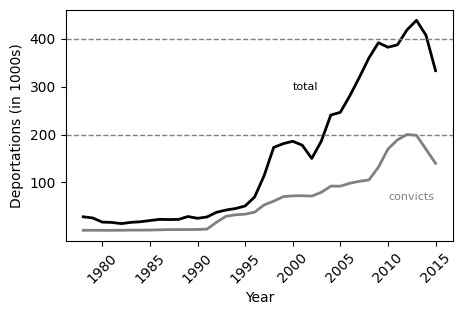

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

dep_tot = pd.read_csv(r"../dat/data_USdeporttotal.csv")

plt.figure(figsize=(5, 3))
plt.plot(dep_tot['YEAR'], dep_tot['TOTAL'], color='black', linewidth=2, label='Total')
plt.plot(dep_tot['YEAR'], dep_tot['CONVICT'], color='grey', linewidth=2, label='Convicts')

# y-axis
plt.yticks([100000, 200000, 300000, 400000], ['100', '200', '300', '400'])

# horizontal dotted lines
plt.axhline(y=200000, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=400000, color='grey', linestyle='--', linewidth=1)

# labels
plt.text(2000, 300000, 'total', fontsize=8, verticalalignment='center')
plt.text(2010, 70000, 'convicts', color='grey', fontsize=8, verticalalignment='center')

# plot
plt.ylabel('Deportations (in 1000s)')
plt.xlabel('Year')
plt.xticks(rotation=45)  

# export figure
plt.savefig('../outputs/figure1.png', format='png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


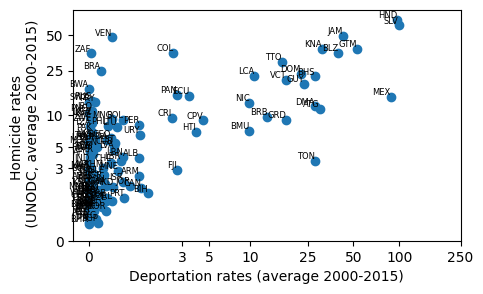

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

agg_mean_graph = pd.read_csv(r"../dat/data_figure2.csv")

# log-transformed variables
agg_mean_graph['plot_y'] = np.log(agg_mean_graph['homrates_pc_unodc_mn'] + 1)
agg_mean_graph['plot_x'] = np.log(agg_mean_graph['deport_convict_mn'] + 1)

# drop na values
PL = agg_mean_graph.dropna(subset=['plot_x', 'plot_y', 'iso3'])

# x and y axis values
y_values = np.array([0, 3, 5, 10, 25, 50])
x_values = np.array([0, 3, 5, 10, 25, 50, 100, 250])

# plot
plt.figure(figsize=(5, 3)) 
plt.scatter(PL['plot_x'], PL['plot_y'])
plt.ylabel('Homicide rates \n (UNODC, average 2000-2015)')
plt.xlabel('Deportation rates (average 2000-2015)')

# x and y axis labels
plt.yticks(np.log(y_values + 1), labels=y_values)
plt.xticks(np.log(x_values + 1), labels=x_values)

# add iso3 codes as labels for each dot
for i, txt in enumerate(PL['iso3']):
    plt.text(PL['plot_x'].iloc[i], PL['plot_y'].iloc[i], txt, fontsize=6, ha='right', va='bottom')

# export figure
plt.savefig('../outputs/figure2.png', format='png', dpi=300, bbox_inches='tight')

# display
plt.show()

# Table 1

In [17]:
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')  
data.set_index(['iso3', 'year'], inplace=True) 

# define control variables:
control_vars = " + war_intrastate + corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (1) convicts'deportation rates, no controls, only country and year fixed effects
mod1 = PanelOLS.from_formula('homrates_unodc ~ deport_convict + EntityEffects + TimeEffects', data)
res1 = mod1.fit(cov_type='clustered', cluster_entity=True)

# (2) convicts'deportation rates, with time-varying controls and country fixed effects
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects {control_vars}', data)
res2 = mod2.fit(cov_type='clustered', cluster_entity=True)

# (3) change in convicts'deportation rates, with time-varying controls and country fixed effects
mod3 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + EntityEffects + TimeEffects {control_vars}', data)
res3 = mod3.fit(cov_type='clustered', cluster_entity=True)

# (4) change in convicts'deportation rates and change in non-convicts'deportation rate, with time-varying controls and country fixed effects
mod4 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + deport_nonconvict_d + EntityEffects + TimeEffects {control_vars}', data)
res4 = mod4.fit(cov_type='clustered', cluster_entity=True)

# (5) change in convicts'deportation rates and change in leading values of convicts'deportation rate, with time-varying controls and country fixed effects
mod5 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + deport_convict_lead + EntityEffects + TimeEffects {control_vars}', data)
res5 = mod5.fit(cov_type='clustered', cluster_entity=True)

# compare models
print(res1.summary)
print(res2.summary)
print(res3.summary)
print(res4.summary)
print(res5.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1389
Estimator:                   PanelOLS   R-squared (Between):              0.2425
No. Observations:                 608   R-squared (Within):               0.1352
Date:                Sun, May 05 2024   R-squared (Overall):              0.2459
Time:                        23:21:30   Log-likelihood                   -1478.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      77.239
Entities:                         123   P-value                           0.0000
Avg Obs:                       4.9431   Distribution:                   F(1,479)
Min Obs:                       2.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             4.3084
                            

# Table 2

In [18]:
import pandas as pd
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare

data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year  
data.set_index(['iso3', 'year'], inplace=True) 

# subset to Latin American and the Caribbean region
data_LAC = data[data['region'] == "Latin America & Caribbean"]

control_vars = "corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (1) convicts'deportation rates, no controls, only country and year fixed effects
mod1 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict + EntityEffects + TimeEffects + {control_vars}', data_LAC)
res1 = mod1.fit(cov_type='clustered', cluster_entity=True)

# (2) convicts'deportation rates, with time-varying controls and country fixed effects
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_d + EntityEffects + TimeEffects + {control_vars}', data_LAC)
res2 = mod2.fit(cov_type='clustered', cluster_entity=True)

# Assuming 'homrates_who' is another dependent variable
# Define a reduced set of controls for WHO data analysis
reduced_controls = "corruption + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

# (3) for deportation rates in levels (WHO data)
mod3 = PanelOLS.from_formula(f'homrates_who ~ deport_convict + EntityEffects + TimeEffects + {reduced_controls}', data_LAC)
res3 = mod3.fit(cov_type='clustered', cluster_entity=True)

# (4) for changes in deportaotin rates (WHO data)
mod4 = PanelOLS.from_formula(f'homrates_who ~ deport_convict_d + EntityEffects + TimeEffects + {reduced_controls}', data_LAC)
res4 = mod4.fit(cov_type='clustered', cluster_entity=True)

# compare models
print(res1.summary)
print(res2.summary)
print(res3.summary)
print(res4.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.4567
Estimator:                   PanelOLS   R-squared (Between):             -703.68
No. Observations:                  99   R-squared (Within):               0.0823
Date:                Sun, May 05 2024   R-squared (Overall):             -670.79
Time:                        23:21:30   Log-likelihood                   -273.72
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.2736
Entities:                          21   P-value                           0.0001
Avg Obs:                       4.7143   Distribution:                   F(12,61)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             18.326
                            

# table 3

In [19]:
import pandas as pd
from linearmodels.iv import IV2SLS
from linearmodels.panel import PanelOLS

data = pd.read_csv(r"../dat/data_replic.csv")
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index(['iso3', 'year'], inplace=True)

# prepping datasets
data_2stp = data.dropna(subset=['homrates_unodc', 'instr_enforce_everify_lag1', 'instr_benef_medicaidpregn_lag1', 'deport_convict'])
data_LAC = data[data['region'] == "Latin America & Caribbean"]
data_LAC2stp = data_LAC.dropna(subset=['homrates_unodc', 'instr_enforce_everify_lag1', 'instr_benef_medicaidpregn_lag1', 'deport_convict'])

# define variables for 2sls
control_vars = "corruption + crime_US_weight + GDP_growth + pop_sh14 + GDPpercapita_const2010USD_log + gini_mkt + polity2 + population_log + remittances_GDP + yr_sch + urban_interp"

instruments = "instr_enforce_everify_lag1 + instr_benef_medicaidpregn_lag1"

endog = "deport_convict"

dependent = "homrates_unodc"

In [20]:
# (1) get 1st step tables for levels
mod1 = PanelOLS.from_formula(f'deport_convict ~ {instruments} + EntityEffects + TimeEffects + war_intrastate + {control_vars}', data_2stp)
res1 = mod1.fit(cov_type='robust')
print(res1.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         deport_convict   R-squared:                        0.4345
Estimator:                   PanelOLS   R-squared (Between):             -1562.8
No. Observations:                 399   R-squared (Within):               0.3110
Date:                Sun, May 05 2024   R-squared (Overall):             -1234.3
Time:                        23:21:31   Log-likelihood                   -1320.5
Cov. Estimator:                Robust                                           
                                        F-statistic:                      16.407
Entities:                          81   P-value                           0.0000
Avg Obs:                       4.9259   Distribution:                  F(14,299)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.7472
                            

In [21]:
# (3) the 2nd step results
data_2stp['deport_convict_hat'] = res1.predict()
mod2 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_hat + EntityEffects + TimeEffects + war_intrastate + {control_vars}', data_2stp)
res2 = mod2.fit(cov_type='robust')
print(res2.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.1890
Estimator:                   PanelOLS   R-squared (Between):             -2.0397
No. Observations:                 399   R-squared (Within):              -0.9588
Date:                Sun, May 05 2024   R-squared (Overall):             -1.8350
Time:                        23:21:31   Log-likelihood                   -938.35
Cov. Estimator:                Robust                                           
                                        F-statistic:                      5.3763
Entities:                          81   P-value                           0.0000
Avg Obs:                       4.9259   Distribution:                  F(13,300)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             1.7978
                            

In [22]:
# (2) get 1st step tables for LAC
mod3 = PanelOLS.from_formula(f'deport_convict ~ {instruments} + EntityEffects + TimeEffects + {control_vars}', data_LAC2stp)
res3 = mod3.fit(cov_type='robust')
print(res3.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         deport_convict   R-squared:                        0.7958
Estimator:                   PanelOLS   R-squared (Between):             -4081.6
No. Observations:                  99   R-squared (Within):               0.0046
Date:                Sun, May 05 2024   R-squared (Overall):             -3100.0
Time:                        23:21:31   Log-likelihood                   -335.42
Cov. Estimator:                Robust                                           
                                        F-statistic:                      17.985
Entities:                          21   P-value                           0.0000
Avg Obs:                       4.7143   Distribution:                   F(13,60)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             13.734
                            

In [23]:
# (4) the 2nd step results for LAC
data_LAC2stp['deport_convict_hat'] = res3.predict()
mod4 = PanelOLS.from_formula(f'homrates_unodc ~ deport_convict_hat + EntityEffects + TimeEffects + {control_vars}', data_LAC2stp)
res4 = mod4.fit(cov_type='robust')
print(res4.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:         homrates_unodc   R-squared:                        0.4161
Estimator:                   PanelOLS   R-squared (Between):             -11.979
No. Observations:                  99   R-squared (Within):              -2.0328
Date:                Sun, May 05 2024   R-squared (Overall):             -9.3646
Time:                        23:21:31   Log-likelihood                   -277.30
Cov. Estimator:                Robust                                           
                                        F-statistic:                      3.6221
Entities:                          21   P-value                           0.0004
Avg Obs:                       4.7143   Distribution:                   F(12,61)
Min Obs:                       1.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             3.5423
                            

# Sensitivity Analysis

In [24]:
# fill in the missing values
data = pd.read_csv(r"../dat/data_replic.csv")
control_vars = ['corruption', 'crime_US_weight', 'GDP_growth', 'pop_sh14', 'GDPpercapita_const2010USD_log', 'gini_mkt', 'polity2', 'population_log', 'remittances_GDP', 'yr_sch', 'urban_interp']

data = data.drop(columns=['Unnamed: 18', 'Unnamed: 22'])
data = data.dropna(subset=['homrates_unodc', 'deport_convict'])

for col in control_vars:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)


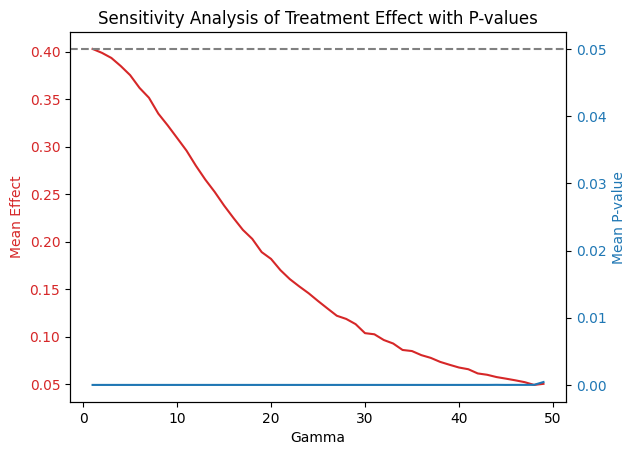

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

def simulate_unobserved_confounding(n, gamma):
    U = norm.rvs(size=n)
    return U * gamma

def estimate_treatment_effect(data, U):
    X = data[control_vars]
    treatment_effect_model = sm.OLS(data['homrates_unodc'], X.assign(treatment=data['deport_convict'] + U))
    results = treatment_effect_model.fit()
    return results.params[-1], results.pvalues[-1]

def sensitivity_analysis(data, gamma_values, iterations=100):
    results = []
    p_values = []
    n = len(data)
    for gamma in gamma_values:
        effects = []
        p_vals = []
        for _ in range(iterations):
            U = simulate_unobserved_confounding(n, gamma)
            effect, p_val = estimate_treatment_effect(data, U)
            effects.append(effect)
            p_vals.append(p_val)
        mean_effect = np.mean(effects)
        std_effect = np.std(effects)
        mean_p_val = np.mean(p_vals)
        results.append((gamma, mean_effect, std_effect))
        p_values.append(mean_p_val)
    return results, p_values


gamma_values = np.arange(1,50,1)
results, p_values = sensitivity_analysis(data, gamma_values)
results_df = pd.DataFrame(results, columns=['Gamma', 'Mean Effect', 'Std Dev'])
p_value_df = pd.DataFrame({'Gamma': gamma_values, 'Mean P-value': p_values})

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Gamma')
ax1.set_ylabel('Mean Effect', color=color)
ax1.plot(gamma_values, results_df['Mean Effect'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean P-value', color=color)
ax2.plot(gamma_values, p_value_df['Mean P-value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0.05, color='grey', linestyle='--')

plt.title('Sensitivity Analysis of Treatment Effect with P-values')
plt.savefig('../outputs/sensitivity_analysis_50.png', format='png')
plt.show()


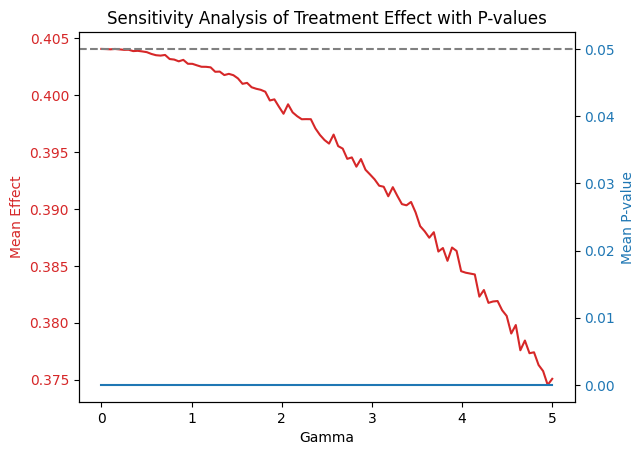

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

def simulate_unobserved_confounding(n, gamma):
    U = norm.rvs(size=n)
    return U * gamma

def estimate_treatment_effect(data, U):
    X = data[control_vars]
    treatment_effect_model = sm.OLS(data['homrates_unodc'], X.assign(treatment=data['deport_convict'] + U))
    results = treatment_effect_model.fit()
    return results.params[-1], results.pvalues[-1]

def sensitivity_analysis(data, gamma_values, iterations=100):
    results = []
    p_values = []
    n = len(data)
    for gamma in gamma_values:
        effects = []
        p_vals = []
        for _ in range(iterations):
            U = simulate_unobserved_confounding(n, gamma)
            effect, p_val = estimate_treatment_effect(data, U)
            effects.append(effect)
            p_vals.append(p_val)
        mean_effect = np.mean(effects)
        std_effect = np.std(effects)
        mean_p_val = np.mean(p_vals)
        results.append((gamma, mean_effect, std_effect))
        p_values.append(mean_p_val)
    return results, p_values


gamma_values = np.linspace(0, 5, 100)
results, p_values = sensitivity_analysis(data, gamma_values)
results_df = pd.DataFrame(results, columns=['Gamma', 'Mean Effect', 'Std Dev'])
p_value_df = pd.DataFrame({'Gamma': gamma_values, 'Mean P-value': p_values})

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Gamma')
ax1.set_ylabel('Mean Effect', color=color)
ax1.plot(gamma_values, results_df['Mean Effect'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Mean P-value', color=color)
ax2.plot(gamma_values, p_value_df['Mean P-value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0.05, color='grey', linestyle='--')

plt.title('Sensitivity Analysis of Treatment Effect with P-values')
plt.savefig('../outputs/sensitivity_analysis_5.png', format='png')
plt.show()
